## 🎓 EXAMEN PRÁCTICO FINAL: EDA & PREPROCESAMIENTO

Contexto: Eres un Data Scientist analizando cómo la IA afectará al mercado laboral en 2030. Tienes el dataset AI_Impact_on_Jobs_2030.csv.

### PARTE 1: Exploración Inicial (El "Rayos X")

Carga el dataset en un DataFrame llamado df y muestra las 5 primeras y las 5 últimas filas.

¿Cuántas filas y columnas tiene? 

Muestra un resumen de los tipos de datos y verifica si hay valores nulos (NaN) en alguna columna.

Nota: Si no hay nulos, escribe en un comentario qué código usarías para rellenar los nulos numéricos con la mediana si los hubiera.

Saca las estadísticas descriptivas (media, min, max, cuartiles) de las columnas numéricas. ¿Cuál es el salario máximo registrado?

In [41]:
import pandas as pd       # Trabajar con dataframes
import numpy as np        # Cálculos numéricos
import matplotlib.pyplot as plt   # Gráficos
import seaborn as sns     # Gráficos avanzados
from sklearn import datasets

df = pd.read_csv("archive/AI_Impact_on_Jobs_2030.csv")
df.head(5)
df.tail(5)
print(f"El numero de filas es: {df.shape[0]} y de columnas : {df.shape[1]} ")

df.info()

# no hay nulos, entonces seria asi....
df.isnull().sum()
cat_cols = df.select_dtypes(include='number').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].median())

df.describe()
df['Average_Salary'].max()
df[['Automation_Probability_2030']]

El numero de filas es: 3000 y de columnas : 18 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                     

,Automation_Probability_2030
0,0.85
1,0.05
2,0.81
3,0.60
4,0.64
...,...
2995,0.20
2996,0.35
2997,0.39
2998,0.46


 ### PARTE 2: Limpieza y Filtrado (El "Bisturí")
 
 Renombrar: Las columnas están en inglés. Cambia el nombre de:

 Job_Title $\rightarrow$ Puesto

Average_Salary $\rightarrow$ Salario_Anual

Risk_Category $\rightarrow$ Riesgo

 Crear Columna: Crea una nueva columna llamada Salario_Mensual dividiendo Salario_Anual entre 12.

 Filtrado Complejo: Crea un nuevo DataFrame llamado df_peligro que contenga solo los trabajos que cumplan DOS condiciones:

 Tener un Riesgo igual a "High".

 Tener una probabilidad de automatización (Automation_Probability_2030) mayor al 90% (0.9).
 
 Selección: De ese df_peligro, muestra solo las columnas Puesto y Salario_Anual.

In [42]:
df.rename(columns={'Job_Title':'Puesto', 
            'Average_Salary': 'Salario_Anual',
            'Risk_Category':'Riesgo'
        }, inplace=True)
df['Salario_Mensual'] = df['Salario_Anual']/12
df_peligro = df[(df['Riesgo']=='High') & (df['Automation_Probability_2030']>0.9)]
df_peligro.loc[:, ['Puesto','Salario_Anual']]

,Puesto,Salario_Anual
18,Retail Worker,148015
27,Customer Support,33267
32,Retail Worker,102124
33,Truck Driver,91629
37,Customer Support,92292
...,...,...
2933,Customer Support,88880
2945,Retail Worker,53929
2947,Retail Worker,115059
2953,Customer Support,73200


### PARTE 3: Análisis y Agrupación (groupby)

Agrupación Simple: ¿Cuál es el salario medio (Average_Salary) por cada Nivel Educativo (Education_Level)? Ordena los resultados de mayor a menor salario.

Conteo: ¿Cuántos trabajos hay en cada categoría de Riesgo? (Low, Medium, High).

Agrupación Avanzada: Agrupa por Riesgo y Education_Level y calcula la media de la AI_Exposure_Index. (Queremos ver quién está más expuesto según su riesgo y estudios).

In [43]:
df.groupby('Education_Level')['Salario_Anual'].mean().sort_values(ascending=False) 
df.groupby('Riesgo')['Riesgo'].value_counts()
df.groupby(by=['Riesgo','Education_Level'])['AI_Exposure_Index'].mean()

Riesgo  Education_Level
High    Bachelor's         0.509521
        High School        0.501711
        Master's           0.515904
        PhD                0.512373
Low     Bachelor's         0.498263
        High School        0.495659
        Master's           0.488457
        PhD                0.502067
Medium  Bachelor's         0.489328
        High School        0.496506
        Master's           0.504680
        PhD                0.509389
Name: AI_Exposure_Index, dtype: float64

### PARTE 4: Visualización (La Foto Finish)

Histograma: Crea un gráfico para ver la distribución de la columna Salario_Anual. ¿Es una curva normal o está sesgada?

Scatter Plot: Crea un gráfico de dispersión para ver la relación entre AI_Exposure_Index (eje X) y Automation_Probability_2030 (eje Y). ¿Se ve alguna correlación?

Gráfico de Barras: Pinta el conteo de trabajos por Education_Level.PARTE 4: Visualización (La Foto Finish)
Histograma: Crea un gráfico para ver la distribución de la columna Salario_Anual. ¿Es una curva normal o está sesgada?

Scatter Plot: Crea un gráfico de dispersión para ver la relación entre AI_Exposure_Index (eje X) y Automation_Probability_2030 (eje Y). ¿Se ve alguna correlación?

Gráfico de Barras: Pinta el conteo de trabajos por Education_Level.

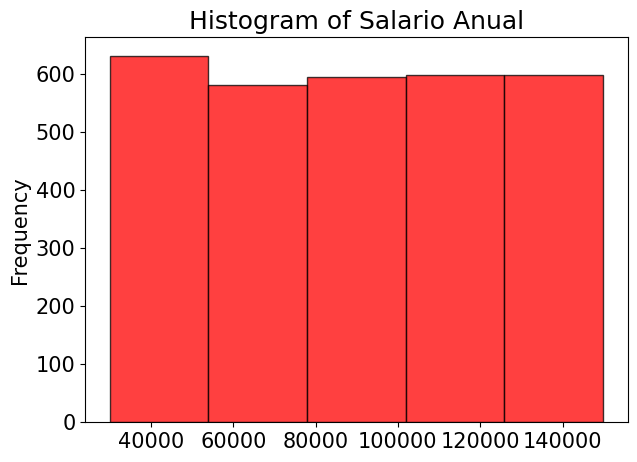

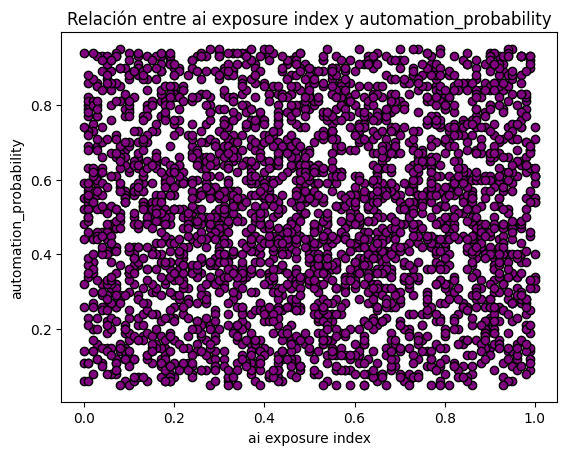

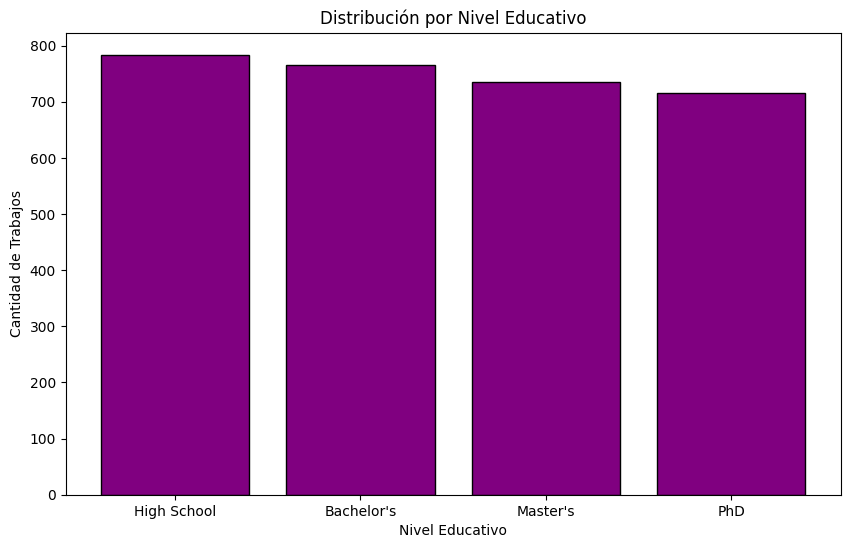

In [44]:
plt.figure(figsize=(7,5))
plt.hist(
    df['Salario_Anual'],             # Datos numéricos
    color='red',        # Color de las barras
    edgecolor='k',      # Color del borde
    alpha=0.75,         # Transparencia
    bins=5              # Número de intervalos
)

# Títulos y etiquetas
plt.title("Histogram of Salario Anual", fontsize=18)
plt.xlabel("", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.scatter(x=df.AI_Exposure_Index, y=df.Automation_Probability_2030, c='purple', edgecolor='k')
plt.title("Relación entre ai exposure index y automation_probability")
plt.xlabel("ai exposure index")
plt.ylabel("automation_probability")
plt.show()

# 1. Preparar los datos (Contar cuántos hay de cada nivel)
educacion_counts = df['Education_Level'].value_counts()

# 2. Configurar el gráfico
plt.figure(figsize=(10,6))

# 3. PINTAR BARRAS (plt.bar)
# Eje X = Los nombres (Bachelor, PhD...) -> educacion_counts.index
# Eje Y = La cantidad (100, 50...) -> educacion_counts.values
plt.bar(x=educacion_counts.index, height=educacion_counts.values, color='purple', edgecolor='k')

plt.title("Distribución por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Cantidad de Trabajos")
plt.show()

Histograma (Salario_Anual)
Lo que ves: Una serie de barras rojas que muestran cuántos trabajos caen en cada rango salarial.

Cómo interpretarlo:

Forma: Observa si las barras más altas están en el centro (forma de campana/normal) o si se inclinan hacia un lado. Si hay muchas barras altas a la izquierda (salarios bajos) y pocas a la derecha (salarios altos), la distribución tiene un sesgo positivo (a la derecha).

Rango: Mira los valores del eje X. Te dicen entre qué mínimo y máximo oscilan los salarios.

Conclusión: "La mayoría de los trabajos se concentran en el rango de salario X, mientras que hay pocos trabajos con salarios muy altos".

Scatter Plot (AI_Exposure vs Automation)
Lo que ves: Una nube de puntos morados.

Cómo interpretarlo:

Tendencia: Busca si los puntos forman una línea o patrón.

Si suben de izquierda a derecha (📈), hay una correlación positiva: "A mayor exposición a la IA, mayor probabilidad de automatización".

Si bajan (📉), es negativa.

Si es una nube sin forma, no hay relación clara.

Densidad: ¿Están los puntos muy juntos o dispersos?

Conclusión: "Observamos una correlación positiva clara: los trabajos con mayor índice de exposición a la IA tienden a tener una probabilidad de automatización más alta".

Gráfico de Barras (Education_Level) - El corregido
Lo que ves: Barras separadas para cada nivel educativo (Bachelor, Master, PhD, High School...).

Cómo interpretarlo:

Comparación: Mira qué barra es la más alta. Esa es la categoría mayoritaria (la Moda).

Desbalance: ¿Hay mucha diferencia entre las barras? Si una es gigante y las otras enanas, tus datos están desbalanceados.

Conclusión: "El nivel educativo más frecuente en el dataset es X (la barra más alta), seguido de Y. La categoría Z es la menos representada

Tienes el dataset cargado en df. Tu objetivo es preparar los datos para predecir la columna Risk_Category (Target).

Convierte todas las columnas de texto a números usando LabelEncoder.

Separa los datos en X (todas las columnas menos el target) e y (la columna Risk_Category).

Divide en Train y Test (80% para entrenar, semilla 42).

Escala la X usando StandardScaler (recuerda la regla de oro del fit/transform).

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_copy= df.copy()

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

df_copy[categorical_cols]=df_copy[categorical_cols].apply(LabelEncoder().fit_transform)


# 1. Definir la Y (Target/Objetivo)
# .values lo convierte en un array de Numpy (le gusta a la profe)
y = df_copy['Riesgo'].values 
#Porque 'gains' es la respuesta ($y$). Si se la dejamos a la $X$, la máquina ya sabría la solución antes de empezar (trampa).
# 2. Definir la X (Features/Características)
# Es TODO menos la columna target. axis=1 significa "borrar columna"
X = df_copy.drop('Riesgo', axis=1).values 

# 3. EL DIVIDIDOR (¡Ojo al orden!)
# Orden OBLIGATORIO: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,   
    random_state=42   # Semilla para que siempre salga la misma división
)

# 1. Inicializar el escalador
sc = StandardScaler()

# 2. ALERTA IMPORTANTE (La Regla de Oro):
# - En TRAIN hacemos .fit_transform(): "Aprende" la media y la aplica.
# - En TEST hacemos .transform(): Solo aplica la media que aprendió del train.
# ¡NUNCA hagas fit en el test! (Sería hacer trampa)

X_train = sc.fit_transform(X_train) # Aprende del train y escala el train
X_test = sc.transform(X_test)       # Escala el test usando la regla del train


###  PENDIENTE EVASLUACUOIN

PARTE 5: Preprocesamiento para ML (Machine Learning)

Encoding: La columna Riesgo tiene valores ("Low", "Medium", "High"). Tienen un orden lógico. Aplica un Ordinal Encoding (Low=0, Medium=1, High=2) y guárdalo en una nueva columna Riesgo_Num.

Escalado: Vamos a entrenar un modelo. Usa StandardScaler para escalar las columnas Salario_Anual y Years_Experience. 